<a href="https://colab.research.google.com/github/CollinsRutto/Social-Media-Analysis-and-scrapping/blob/main/Soup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# import pandas, requests, bs4, sleep
from time import sleep
import requests
import pandas as pd
from bs4 import BeautifulSoup

def soup2list(src, list_, attr=None):
    if attr:
        for val in src:
            list_.append(val[attr])
    else:
        for val in src:
            list_.append(val.get_text(strip=True))
# Identify the
users = []
userReviewNum = []
ratings = []
locations = []
dates = []
reviews = []

from_page = 1
to_page = 7
company = 'goodreads.com'

for i in range(from_page, to_page + 1):
    result = requests.get(f"https://www.trustpilot.com/review/{company}?page={i}")
    soup = BeautifulSoup(result.content, 'html.parser')

    soup2list(soup.find_all('span', {'class': 'typography_heading-xxs__QKBS8 typography_appearance-default__AAY17'}), users)
    soup2list(soup.find_all('div', {'class': 'typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_detailsIcon__Fo_ua'}), locations)
    soup2list(soup.find_all('span', {'class': 'typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l'}), userReviewNum)
    soup2list(soup.find_all('div', {'class': 'styles_reviewHeader__iU9Px'}), dates)
    soup2list(soup.find_all('div', {'class': 'styles_reviewHeader__iU9Px'}), ratings, attr='data-service-review-rating')
    soup2list(soup.find_all('div', {'class': 'styles_reviewContent__0Q2Tg'}), reviews)



In [19]:
# To avoid throttling
    sleep(1)



IndentationError: unexpected indent (<ipython-input-19-340f2fd1b019>, line 2)

In [20]:
# Debug: Print lengths of all lists to identify the issue
print("Length of users:", len(users))
print("Length of locations:", len(locations))
print("Length of userReviewNum:", len(userReviewNum))
print("Length of dates:", len(dates))
print("Length of ratings:", len(ratings))
print("Length of reviews:", len(reviews))



Length of users: 124
Length of locations: 124
Length of userReviewNum: 145
Length of dates: 124
Length of ratings: 124
Length of reviews: 124


In [21]:
# We shall Filter out userReviewNum to match the length of other lists
userReviewNum = userReviewNum[:len(users)]  # Use the length of 'users' list



In [22]:
# We Create DataFrame only if all lists have the same length
if len(users) == len(locations) == len(userReviewNum) == len(dates) == len(ratings) == len(reviews):
    review_data = pd.DataFrame({
        'Username': users,
        'Total reviews': userReviewNum,
        'Location': locations,
        'Date': dates,
        'Content': reviews,
        'Rating': ratings
    })
    print("DataFrame created successfully.")
    print(review_data.head())  # Display the first few rows of the DataFrame
else:
    print("Error: Lengths of lists do not match, cannot create DataFrame.")


DataFrame created successfully.
          Username Total reviews Location          Date  \
0        Anastasia   31K reviews       UA  Mar 27, 2024   
1     Steve Sarner   16K reviews       US  Mar 15, 2024   
2  Home Owner FUJB   15K reviews       US  Mar 10, 2024   
3      Missy Gotty      3reviews       GB   Jan 5, 2024   
4             Alex      4reviews       US   Feb 1, 2024   

                                             Content Rating  
0  My virtual libraryI started using Goodreads as...      4  
1  Goodreads RocksGoodreads rocks. It's a great s...      5  
2  REVIEWBOMB Corruption FAKE ACCOUNTSREVIEWBOMB ...      1  
3  Very shady company!Very shady company who make...      1  
4  I love Goodreads!I love Goodreads! They helped...      5  


In [23]:
# return sample data
review_data

,Username,Total reviews,Location,Date,Content,Rating
0,Anastasia,31K reviews,UA,"Mar 27, 2024",My virtual libraryI started using Goodreads as...,4
1,Steve Sarner,16K reviews,US,"Mar 15, 2024",Goodreads RocksGoodreads rocks. It's a great s...,5
2,Home Owner FUJB,15K reviews,US,"Mar 10, 2024",REVIEWBOMB Corruption FAKE ACCOUNTSREVIEWBOMB ...,1
3,Missy Gotty,3reviews,GB,"Jan 5, 2024",Very shady company!Very shady company who make...,1
4,Alex,4reviews,US,"Feb 1, 2024",I love Goodreads!I love Goodreads! They helped...,5
...,...,...,...,...,...,...
119,Manuela,2reviews,US,"Apr 25, 2015",Awesome siteThere really is not anything more ...,5
120,Donna,5reviews,GB,"Jan 29, 2023",Hate the new look to the site!Date of experien...,2
121,Mustafa,4reviews,IR,"Aug 6, 2022",The reviews are wonderful and relative.Date of...,5
122,Miloš Belčević,3reviews,US,"Updated May 26, 2020",Love Good reads!Love Goodreads since 2013!Date...,5


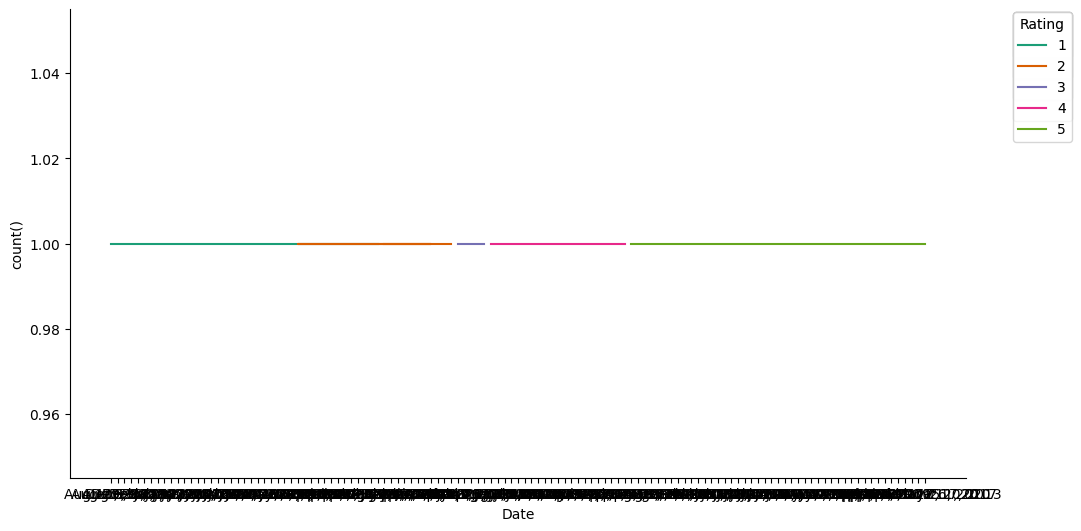

In [25]:
# Import matplotlib, pyplot and seaborn to show date against count
# @title Date vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = review_data.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Rating')):
  _plot_series(series, series_name, i)
  fig.legend(title='Rating', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

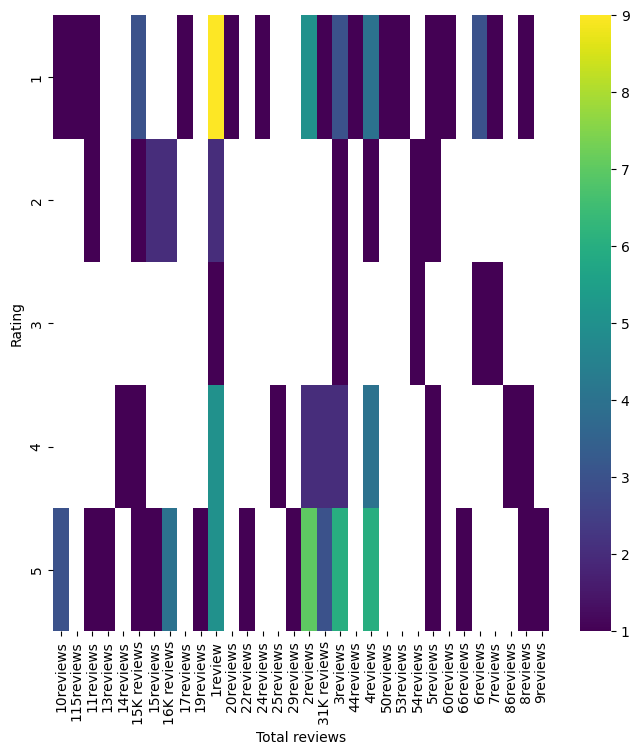

In [26]:
# We shall request matplotlib, pyplot to showcase Total reviews against Rating
# @title Total reviews vs Rating

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Rating'].value_counts()
    for x_label, grp in review_data.groupby('Total reviews')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Total reviews')
_ = plt.ylabel('Rating')

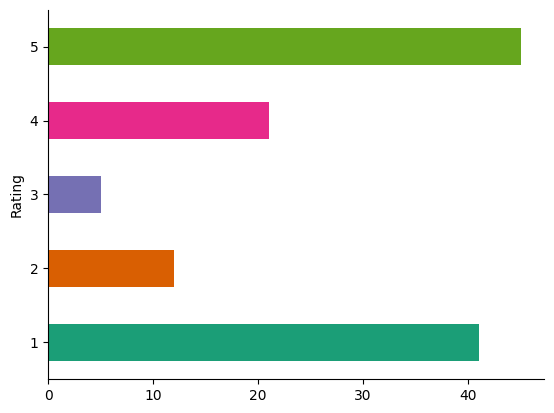

In [27]:
# Import matplotlib, pyplot and seaborn to show ratings against count
#@title Rating

from matplotlib import pyplot as plt
import seaborn as sns
review_data.groupby('Rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [28]:
# Convert the DataFrame to a CSV file and download it
review_data.to_csv('reviews.csv', index=False)
files.download('reviews.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
# Import the required module for file download (for Google Colab)
from google.colab import files




In [30]:
# Convert the DataFrame to a CSV file
review_data.to_csv('reviews.csv', index=False)
# Download the CSV file
files.download('reviews.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>